In [6]:
#Load packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib.pyplot import plot, show, savefig, xlim, figure, \
                ylim, legend, boxplot, setp, axes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
#Load data
SD = pd.read_csv("/Users/shivamsrivastav/Desktop/Madison/Fall 21/Machine Learning/Assignment/StateData.csv") #Read CSV
SD.head()

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,-86.7509,32.5901,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,-127.2500,49.2500,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,-111.6250,34.2192,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,-92.2992,34.7336,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,-119.7730,36.5341,West


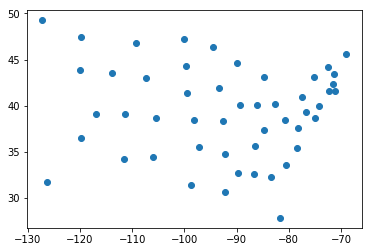

In [17]:
#Scatterplot
plt.scatter(x=SD['Longitude'], y=SD['Latitude'])
plt.show()

In [19]:
Lat = SD["Latitude"]
Frost = SD ["Frost"]

In [29]:
Lat.min()

27.8744

In [32]:
(SD.loc[SD['Latitude'] == 27.8744])

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Region
8,8277,4815,1.3,70.66,10.7,52.6,11,54090,-81.685,27.8744,South


In [26]:
Frost.min()

0

In [33]:
(SD.loc[SD['Frost'] == 0])

,Population,Income,Illiteracy,LifeExp,Murder,HighSchoolGrad,Frost,Area,Longitude,Latitude,Region
10,868,4963,1.9,73.6,6.2,61.9,0,6425,-126.25,31.75,West


In [36]:
SD["Latitude"].idxmin()

8

In [72]:
Grad_Rate = SD.groupby('Region')['HighSchoolGrad'].mean()

In [73]:
Grad_Rate

Region
North Central    54.516667
Northeast        53.966667
South            44.343750
West             62.000000
Name: HighSchoolGrad, dtype: float64

In [55]:
Grad_Rate.idxmax()

'West'

In [56]:
HS_Grad_Rate = SD.groupby('Region')['HighSchoolGrad']

In [61]:
distribution = SD['HighSchoolGrad']
weights = SD['Population']

In [74]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [76]:
Weighted_Avg = SD.groupby(["Region"]).apply(wavg, "HighSchoolGrad", "Population")

In [77]:
Weighted_Avg

Region
North Central    53.716965
Northeast        53.006149
South            44.952587
West             62.211639
dtype: float64

In [79]:
Weighted_Avg.idxmax()

'West'

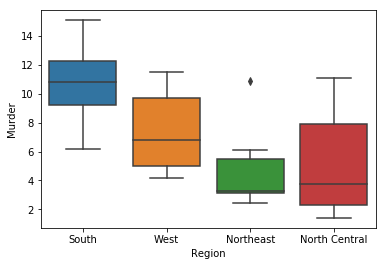

In [86]:
#Boxplot of murders
sns.boxplot(x ='Region', y ='Murder', data = SD)

In [90]:
DF = SD.groupby(['Region']).median()

In [94]:
High_Median_Murder_Rate = DF['Murder'].idxmax()
print(High_Median_Murder_Rate)

South


In [95]:
DF_Max = SD.groupby(['Region']).max()
DF_Min = SD.groupby(['Region']).min()
DF_Range = DF_Max - DF_Min

In [96]:
Max_Range = DF_Range['Murder'].idxmax()
print(Max_Range)

North Central


In [35]:
#Regression Equation
X = SD[["Population", "Income", "Illiteracy", "Murder", "HighSchoolGrad", "Frost", "Area"]]
Y = SD["LifeExp"]
L_reg1 = LinearRegression()
L_reg1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
#Regression Coefficient
SD_Coeff = pd.DataFrame(L_reg1.coef_, X.columns, columns=['Coefficient'])
SD_Coeff


,Coefficient
Population,5.180036e-05
Income,-2.180424e-05
Illiteracy,3.382032e-02
Murder,-3.011232e-01
HighSchoolGrad,4.892948e-02
Frost,-5.735001e-03
Area,-7.383166e-08


In [40]:
#Interception 
L_reg1.intercept_

70.94322411112941

In [43]:
# StatModel Liner Regression
import statsmodels.api as sm
X = SD.LifeExp
Y = sm.add_constant(SD[['Population','Income','Illiteracy','Murder', 'HighSchoolGrad', 'Frost', 'Area']], prepend=False)

Model_1 = sm.OLS(X,Y)
Stat_Mod1 = Model_1.fit()
print(Stat_Mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                LifeExp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     16.74
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           2.53e-10
Time:                        00:09:26   Log-Likelihood:                -51.855
No. Observations:                  50   AIC:                             119.7
Df Residuals:                      42   BIC:                             135.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Population       5.18e-05   2.92e-05      1.

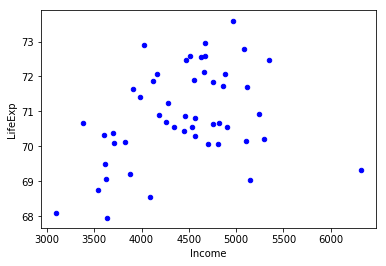

In [113]:
#Scatter Plot for Income v/s Life Exp
plt1 = SD.plot.scatter(x="Income",y='LifeExp',color='Blue')

In [116]:
plt.savefig('foo.pdf')

<Figure size 432x288 with 0 Axes>

In [46]:
#Regression Equation with 3 features
import statsmodels.api as sm

X = SD.LifeExp
Y = sm.add_constant(SD[['Murder', 'HighSchoolGrad', 'Frost']], prepend=False)

Model_2 = sm.OLS(X,Y)
Stat_Mod2 = Model_2.fit()
print(Stat_Mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                LifeExp   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     38.03
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           1.63e-12
Time:                        00:13:52   Log-Likelihood:                -53.987
No. Observations:                  50   AIC:                             116.0
Df Residuals:                      46   BIC:                             123.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Murder            -0.2831      0.037     -7.

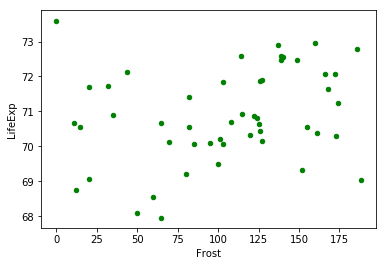

In [122]:
#Scatter Plot for Frost v/s Life Exp
SD.plot.scatter(x="Frost",y='LifeExp',color='green')

In [49]:
#Range of Frost Available
Range = max(SD["Frost"])-min(SD["Frost"])
Range

188

In [41]:
#Years of LifeExp eqaute:
Yrs = Range * L_reg2.coef_[2]
-Yrs

1.2994061089502758